In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df_train = pd.read_pickle('Clean_Data/training_data.csv')
df_test = pd.read_pickle('Clean_Data/testing_data.csv')
df_val = pd.read_pickle('Clean_Data/validation_data.csv')

In [3]:
print(df_train.head(1))
print(df_test.head(1))
print(df_val.head(1))

                                               Image   Label
0  [[29, 27, 30, 28, 27, 26, 28, 29, 30, 29, 28, ...  Normal
                                               Image   Label
0  [[25, 24, 21, 19, 19, 21, 20, 21, 20, 20, 20, ...  Normal
                                               Image   Label
0  [[6, 23, 32, 30, 40, 37, 44, 43, 40, 38, 39, 4...  Normal


In [4]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(5216, 2)
(624, 2)
(16, 2)


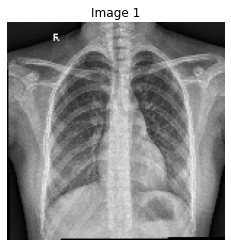

In [5]:
_ = plt.imshow(df_train['Image'][0], cmap='gray')
_ = plt.axis('off')
_ = plt.title('Image 1')

In [6]:
df_train['Image'][0].shape

(150, 150)

## Split Data & Reshape

In [7]:
X_train = df_train['Image']
X_train = np.concatenate(X_train).reshape(X_train.shape[0], X_train[0].shape[0], X_train[0].shape[1])
X_train = np.expand_dims(X_train, axis=-1)
y_train = df_train['Label']

X_test = df_test['Image']
X_test = np.concatenate(X_test).reshape(X_test.shape[0], X_test[0].shape[0], X_test[0].shape[1])
X_test = np.expand_dims(X_test, axis=-1)
y_test = df_test['Label']

X_val = df_val['Image']
X_val = np.concatenate(X_val).reshape(X_val.shape[0], X_val[0].shape[0], X_val[0].shape[1])
X_val = np.expand_dims(X_val, axis=-1)
y_val = df_val['Label']

In [8]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)
print('Validation data shape : ', X_val.shape, y_val.shape)

Training data shape :  (5216, 150, 150, 1) (5216,)
Testing data shape :  (624, 150, 150, 1) (624,)
Validation data shape :  (16, 150, 150, 1) (16,)


## Preprocess Data

### Data Augmentation

To avoid overfitting data due to small image set.
- Randomly flip horizontally
- Randomly rotate by 10%
- Randomly vary height by 10%
- Randomly vary width by 10%

In [31]:
data_augmentation = keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomHeight((-0.1,0.1)), 
     layers.experimental.preprocessing.RandomWidth((-0.1,0.1))
    ])

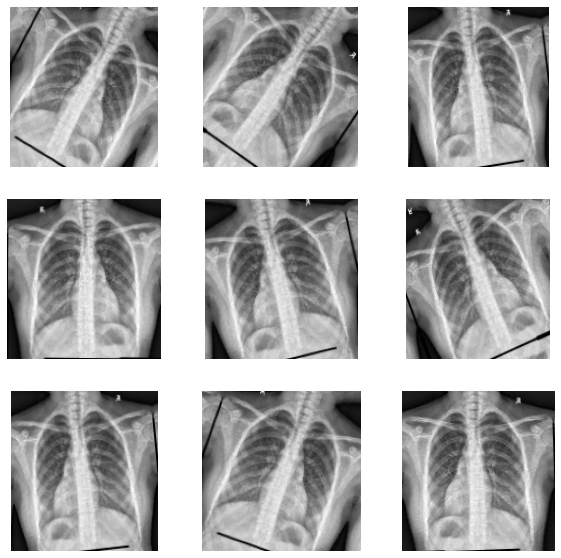

In [33]:
plt.figure(figsize=(10,10))
for i in range(9):
    augmented_images = data_augmentation(X_train)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'), cmap='gray')
    plt.axis('off')

### Standardize

Training on GPU so will augment on device, synchronously with the rest of model execution.

Data augmentation inactive at test time, input samples will only be augmented buting fit.

In [37]:
inputs = keras.Input(shape=X_train.shape)
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)

In [36]:
keras.Input??

### Equalize Images

In [ ]:
# Define function to equalize list of images
def im_equalize(df_col, df_new_col):
    im_equalized = []
    for im in range(len(df_col)):
        hist = ndi.histogram(df_col[im], min=0, max=255, bins=256)
        cdf = hist.cumsum() / hist.sum()
        im_equalized.append(cdf[df_col[im]] * 255)
    df_new_col = im_equalized

In [ ]:
im_equalize(df_train['Image'], equal)

In [ ]:
# Verify im_equalize function works
im_equalize(df_train['Image'])

_ = plt.imshow(df_train['Image'][42], cmap='gray')
_ = plt.title('Original')
_ = plt.axis('off')
plt.show()

_ = plt.imshow(df_train['Image_Equalized'][42], cmap='gray')
_ = plt.title('Equalized')
_ = plt.axis('off')
plt.show()

## Model

In [ ]:
model = Sequential()
